### Employee Attrition Analysis

This dataset focuses on understanding employee attrition. The goal of this analysis is to identify factors or patterns that contribute to attrition, allowing employers to implement preventive measures. From the employer's perspective, employee attrition results in both monetary and non-monetary losses.

#### Analysis Workflow:
- **Exploratory Data Analysis (EDA)**: Conducted to understand the distribution of data, identify outliers, and discover initial patterns related to employee attrition.
- **Data Cleaning**: Performed data preprocessing to handle missing values, standardize data formats, and remove any inconsistencies.
- **Correlation Analysis**: Analyzed the relationships between features to understand how different variables interact and their potential impact on attrition.
- **Modeling**: Tested multiple machine learning models and evaluated their performance to select the best one for predicting attrition probabilities.
- **Probabilistic Prediction**: Used the selected model to predict the probability of attrition for each employee, providing insights into the likelihood of turnover.
- **Model Interpretability**: Utilized libraries such as **Shapash**, **SHAP**, and **LIME** to interpret the model results, offering a visual understanding of feature importance and the factors influencing attrition.

By understanding these patterns, employers can take targeted actions to reduce attrition, thereby minimizing the loss of valuable talent.


### **Import packages**

In [343]:
# Data processing packages
import numpy as np 
import pandas as pd 

# Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

# Machine Learning packages
from sklearn.svm import SVC, NuSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_digits
from sklearn import metrics, preprocessing


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
# Other packages
from math import sqrt
from datetime import datetime, timedelta
import warnings
import random
import decimal

# Suppressing warnings
warnings.filterwarnings("ignore")

# Setting Seaborn style
sns.set()

# Setting Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load dataset
digits = load_digits()

# Inline plotting in Jupyter notebooks
%matplotlib inline


In [344]:
# Making output cell scrollable
from IPython.display import display, HTML

# Set a global CSS rule for the notebook
display(HTML('''
    <style>
        .output_scroll {
            max-height: 500px; /* Set the maximum height for scroll */
            overflow-y: scroll;
            border: 1px solid #ccc;
        }
    </style>
'''))


### **Import data**

In [378]:
data = pd.read_csv('Attrition_data.csv', index_col=None)
# data = data.reset_index()
data.head(2)

Index  Age Attrition     BusinessTravel  DailyRate              Department  \
0      1   41       Yes      Travel_Rarely       1102                   Sales   
1      2   49        No  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   

              JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0     Sales Executive                4        Single           5993   
1  Research Scientist                2       Married           5130   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7

In [379]:
data.shape

(1470, 36)

### **Check and remediate if there are any null values**

In [380]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Index                     1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [381]:
data.describe()

Index          Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean    735.500000    36.923810   802.485714          9.192517     2.912925   
std     424.496761     9.135373   403.509100          8.106864     1.024165   
min       1.000000    18.000000   102.000000          1.000000     1.000000   
25%     368.250000    30.000000   465.000000          2.000000     2.000000   
50%     735.500000    36.000000   802.000000          7.000000     3.000000   
75%    1102.750000    43.000000  1157.000000         14.000000     4.000000   
max    1470.000000    60.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1.093082    20.329428   
min              1.0        1.000000                 1.000000    30.000000   
25%              1.0      491.250000                 2.000000    48.000000   
50%              1.0     1020.500000                 3.000000    66.000000   
75%              1.0     1555.750000                 4.000000    83.750000   
max              1.0     2068.000000                 4.000000   100.000000   

       JobInvolvement     JobLevel  JobSatisfaction  MonthlyIncome  \
count     1470.000000  1470.000000      1470.000000    1470.000000   
mean         2.729932     2.063946         2.728571    6502.931293   
std          0.711561     1.106940         1.102846    4707.956783   
min          1.000000     1.000000         1.000000    1009.000000   
25%          2.000000     1.000000         2.000000    2911.000000   
50%          3.000000     2.000000         3.000000    4919.000000   
75%          3.000000     3.000000         4.000000    8379.000000   
max          4.000000     5.000000         4.000000   19999.000000   

        MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count   1470.000000         1470.000000        1470.000000        1470.000000   
mean   14313.103401            2.693197          15.209524           3.153741   
std     7117.786044            2.498009           3.659938           0.360824   
min     2094.000000            0.000000          11.000000           3.000000   
25%     8047.000000            1.000000          12.000000           3.000000   
50%    14235.500000            2.000000          14.000000           3.000000   
75%    20461.500000            4.000000          18.000000           3.000000   
max    26999.000000            9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       Year

**COMMENT:** Above output shows that there are No Null values.

### **Check and remove if there are any fields which does not add value**

In [382]:
for col in data.columns:
    print(f'\033[1;30;47m{col}\033[0m')  # Bold black text on white background for the column name
    print(f'\n{data[col].value_counts().head()}\n\n\n')


Index

Index
1      1
988    1
986    1
985    1
984    1
Name: count, dtype: int64



Age

Age
35    78
34    77
36    69
31    69
29    68
Name: count, dtype: int64



Attrition

Attrition
No     1233
Yes     237
Name: count, dtype: int64



BusinessTravel

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64



DailyRate

DailyRate
691     6
408     5
530     5
1329    5
1082    5
Name: count, dtype: int64



Department

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64



DistanceFromHome

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
Name: count, dtype: int64



Education

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64



EducationField

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Name: count, dty

# Visualizing the data to get more insights

### ___Histogram of age

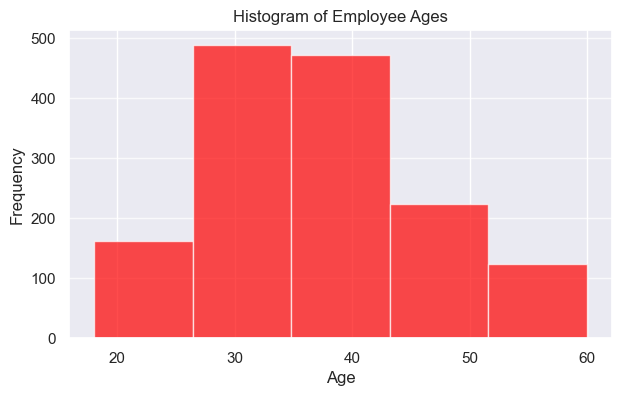

In [278]:
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(7, 4))
plt.hist(df['Age'], bins=5, color='red', alpha=0.7)
plt.title('Histogram of Employee Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### ___Charts of Attrition Counts

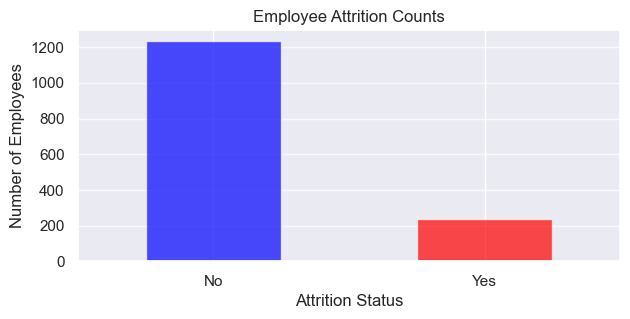

In [279]:
# Count attrition values
attrition_counts = data['Attrition'].value_counts()

# Plotting
plt.figure(figsize=(7, 3))
attrition_counts.plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.title('Employee Attrition Counts')
plt.xlabel('Attrition Status')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()


**Blox plot attritiob by age**

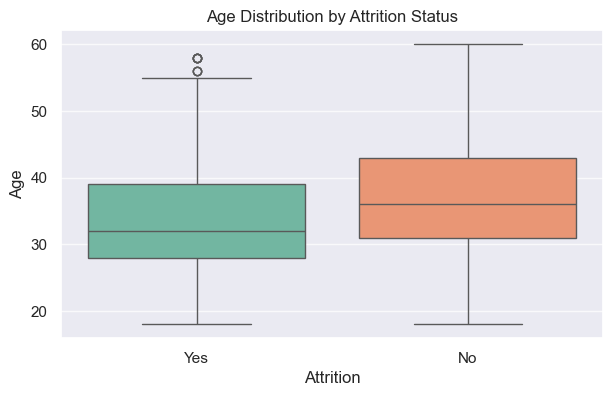

In [280]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='Attrition', y='Age', data=df, palette="Set2")
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.grid(axis='y', alpha=0.75)
plt.show()

### ___Pie Chart of Gender Distribution

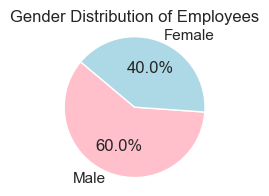

In [282]:
f = pd.DataFrame(data)

# Count gender values
gender_counts = df['Gender'].value_counts()

# Plotting
plt.figure(figsize=(2, 2))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'lightblue'])
plt.title('Gender Distribution of Employees')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### ___Bar Chart of Job Roles by employee count

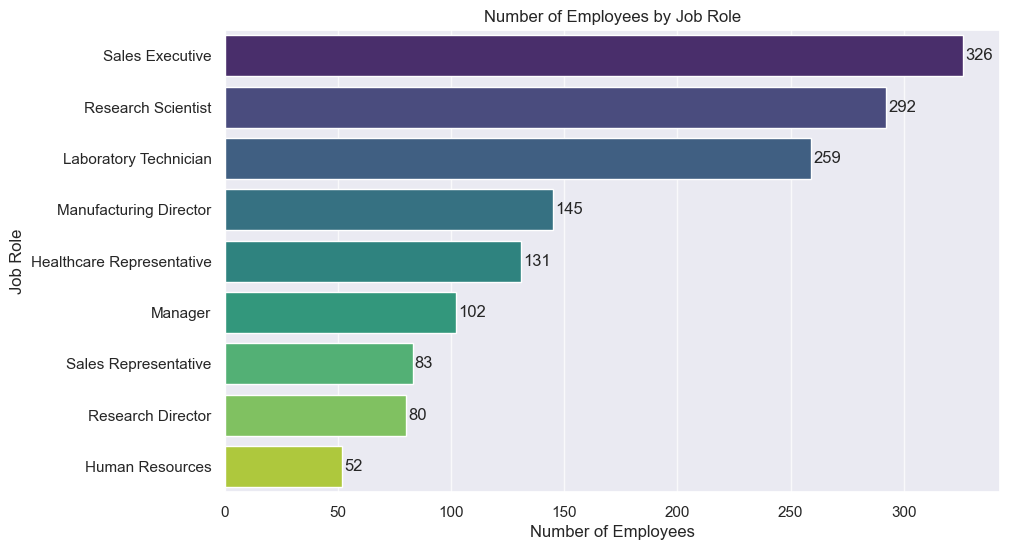

In [228]:
df = pd.DataFrame(data)

# Count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='JobRole', data=df, order=df['JobRole'].value_counts().index, palette="viridis")

# Adding value annotations above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 1, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')

plt.title('Number of Employees by Job Role')
plt.xlabel('Number of Employees')
plt.ylabel('Job Role')
plt.grid(axis='x', alpha=0.75)
plt.show()

### ___Bar Plot of Average Monthly Income by Department

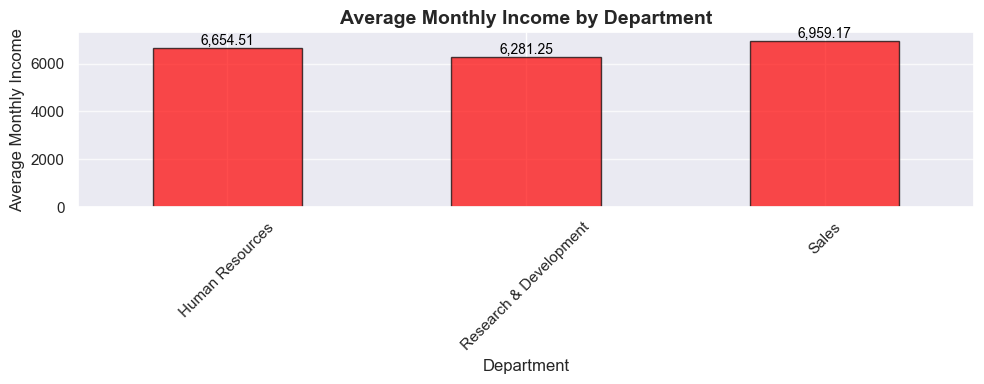

In [261]:
df = pd.DataFrame(data)

# Average Monthly Income by Department
avg_income = df.groupby('Department')['MonthlyIncome'].mean()

# Bar plot with enhancements
plt.figure(figsize=(10, 4))
bars = avg_income.plot(kind='bar', color='Red', alpha=0.7, edgecolor='black')

# Adding value annotations above the bars
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():,.2f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10, color='black')

# Chart design enhancements
plt.title('Average Monthly Income by Department', fontsize=14, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Monthly Income', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout to fit all elements

plt.show()

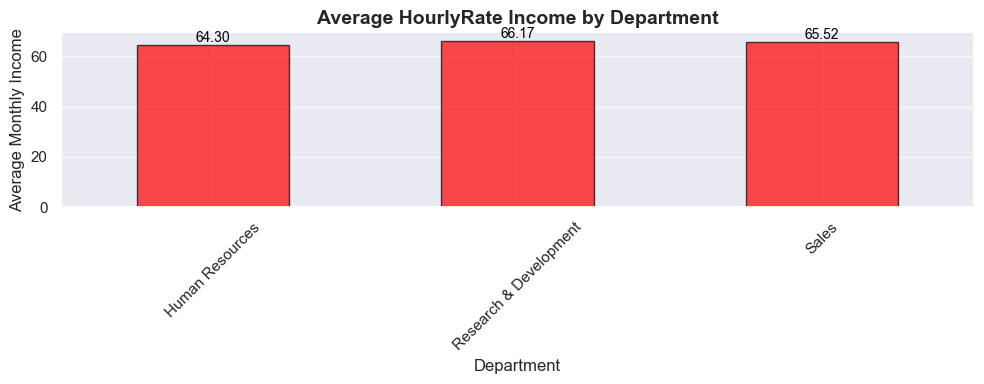

In [283]:
df = pd.DataFrame(data)

# Average Monthly Income by Department
avg_income = df.groupby('Department')['HourlyRate'].mean()

# Bar plot with enhancements
plt.figure(figsize=(10, 4))
bars = avg_income.plot(kind='bar', color='Red', alpha=0.7, edgecolor='black')

# Adding value annotations above the bars
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():,.2f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10, color='black')

# Chart design enhancements
plt.title('Average HourlyRate Income by Department', fontsize=14, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Monthly Income', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout to fit all elements

plt.show()

**Average Monthly Income by Department**

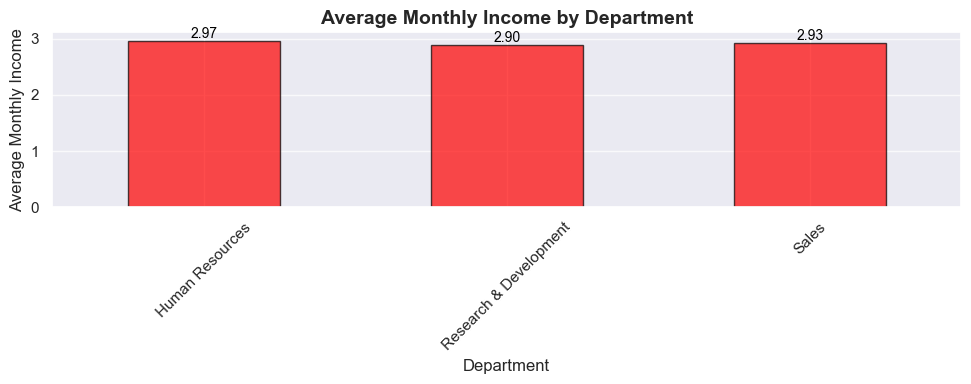

In [263]:
df = pd.DataFrame(data)

# Average Monthly Income by Department
avg_income = df.groupby('Department')['Education'].mean()

# Bar plot with enhancements
plt.figure(figsize=(10, 4))
bars = avg_income.plot(kind='bar', color='Red', alpha=0.7, edgecolor='black')

# Adding value annotations above the bars
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():,.2f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10, color='black')

# Chart design enhancements
plt.title('Average Monthly Income by Department', fontsize=14, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Monthly Income', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout to fit all elements

plt.show()

### ___Distribution of Environment Satisfaction by Employee Count

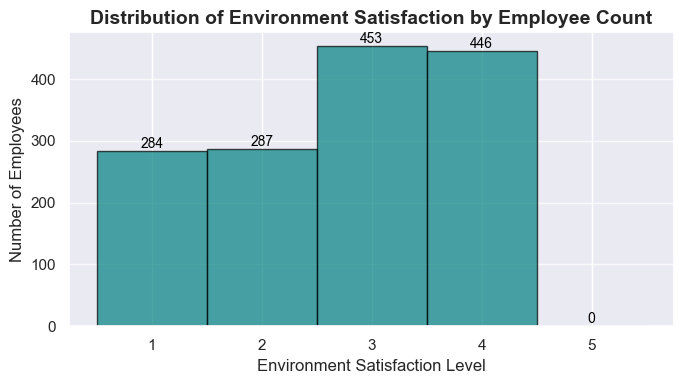

In [268]:
df = pd.DataFrame(data)

# Histogram for Environment Satisfaction with gaps between bars
plt.figure(figsize=(7, 4))
counts, bins, patches = plt.hist(df['EnvironmentSatisfaction'], bins=range(1, 7), color='teal', alpha=0.7, edgecolor='black', align='left')

# Adding value annotations above the bars
for count, x in zip(counts, range(len(counts))):
    plt.annotate(f'{int(count)}', 
                 (x + 1, count), 
                 ha='center', va='bottom', fontsize=10, color='black')

# Chart enhancements
plt.title('Distribution of Environment Satisfaction by Employee Count', fontsize=14, fontweight='bold')
plt.xlabel('Environment Satisfaction Level', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(range(1, 6))  # Assuming satisfaction levels are 1 to 5
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout to fit all elements

plt.show()

**Box plot of satisfaction by experience**

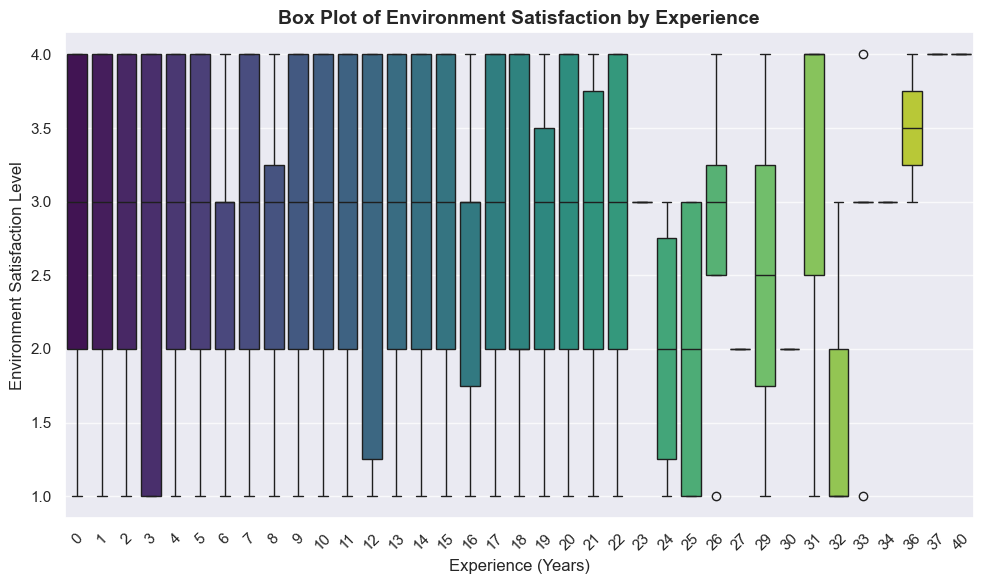

In [269]:
df = pd.DataFrame(data)

# Box plot of Environment Satisfaction by Experience
plt.figure(figsize=(10, 6))
sns.boxplot(x='YearsAtCompany', y='EnvironmentSatisfaction', data=df, palette='viridis')

# Chart enhancements
plt.title('Box Plot of Environment Satisfaction by Experience', fontsize=14, fontweight='bold')
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Environment Satisfaction Level', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout to fit all elements

plt.show()

**Box plot of satisfaction by experience**

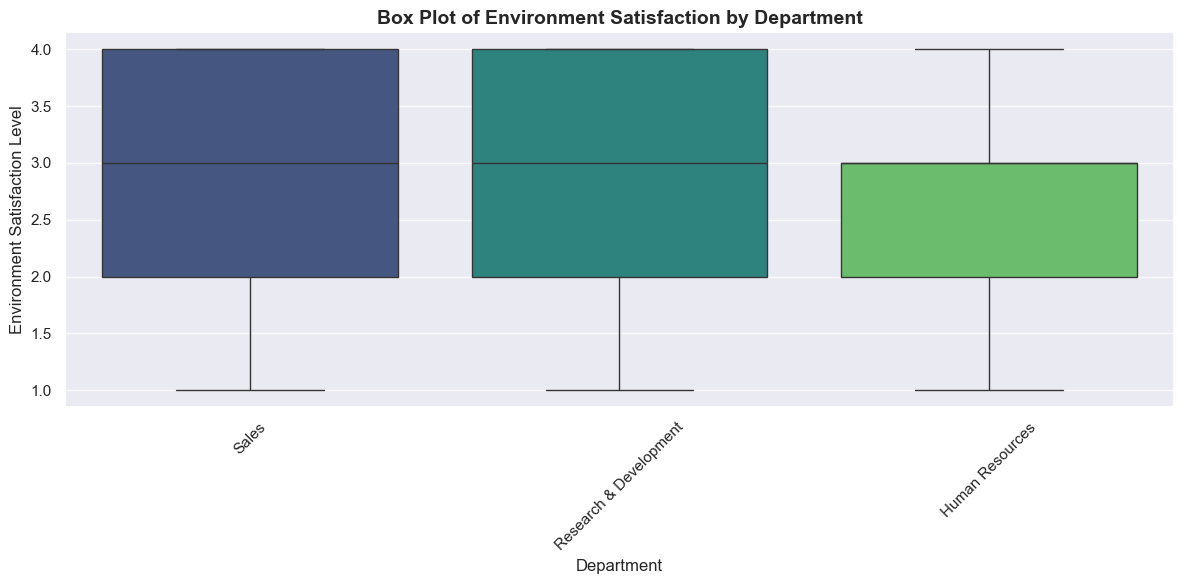

In [270]:
df = pd.DataFrame(data)

# Box plot of Environment Satisfaction by Department
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='EnvironmentSatisfaction', data=df, palette='viridis')

# Chart enhancements
plt.title('Box Plot of Environment Satisfaction by Department', fontsize=14, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Environment Satisfaction Level', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout to fit all elements

plt.show()

### ___ Histogram of Salary Hike Distribution

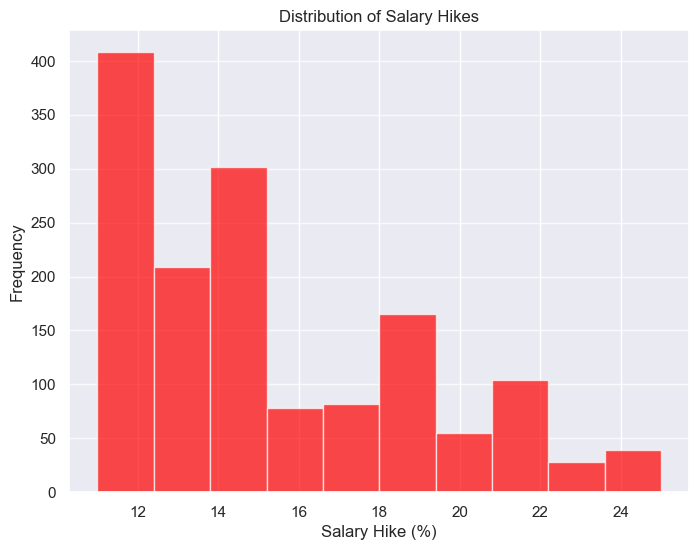

In [234]:
df = pd.DataFrame(data)

# Histogram of Salary Hike
plt.figure(figsize=(8, 6))
plt.hist(df['PercentSalaryHike'], bins=10, color='red', alpha=0.7)
plt.title('Distribution of Salary Hikes')
plt.xlabel('Salary Hike (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Box Plot of Salary Hikes by Experience**

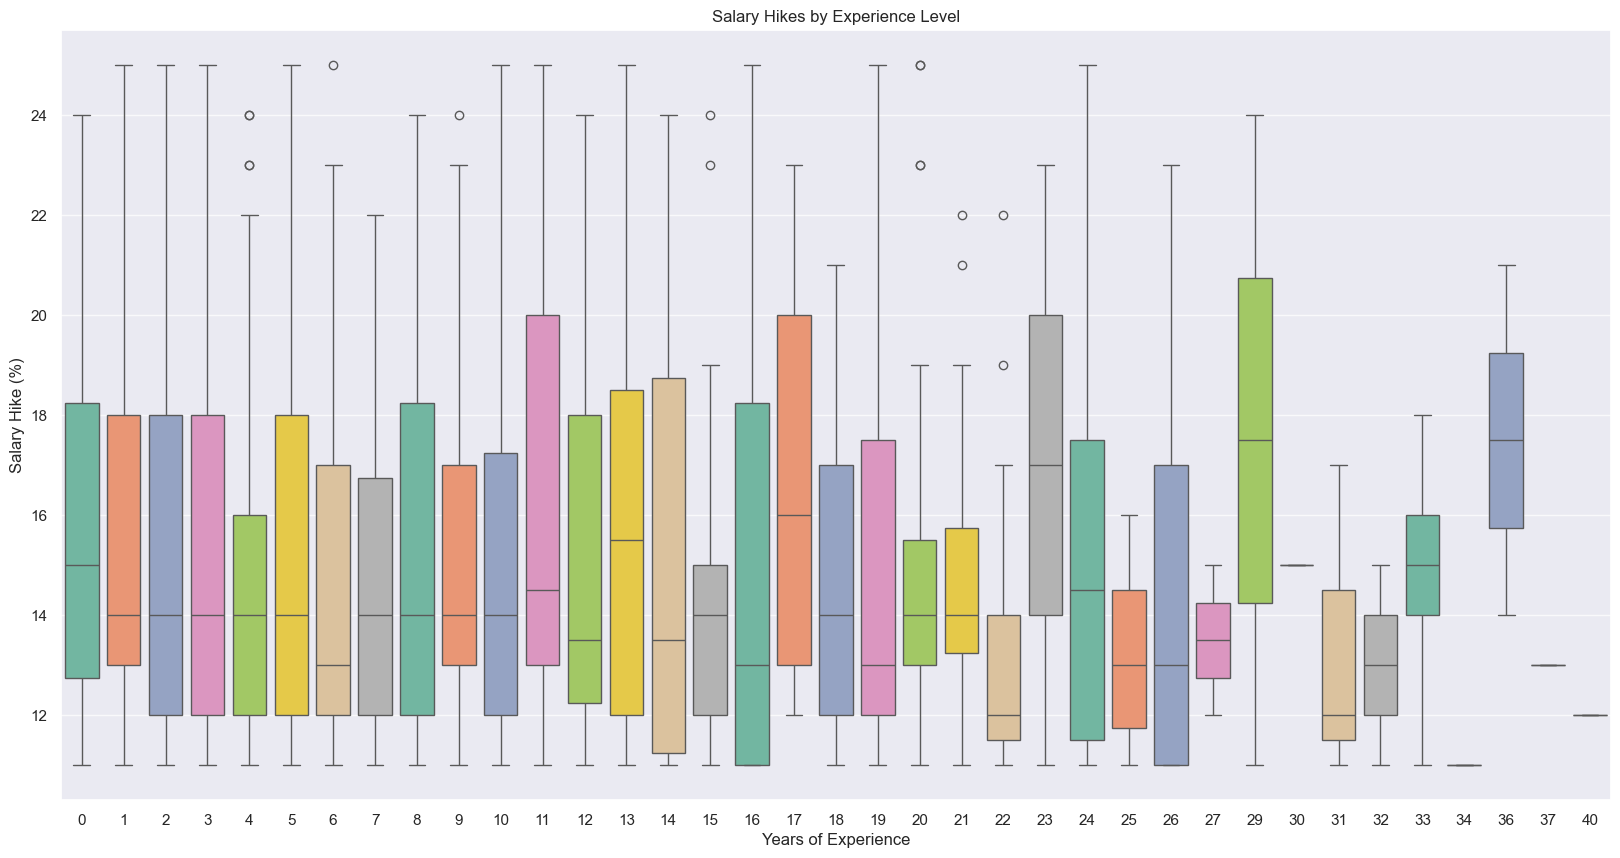

In [242]:
df = pd.DataFrame(data)

# Box plot of Salary Hikes by Experience
plt.figure(figsize=(20, 10))
sns.boxplot(x='YearsAtCompany', y='PercentSalaryHike', data=df, palette="Set2")
plt.title('Salary Hikes by Experience Level')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike (%)')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Box Plot of Salary Hikes by Department**

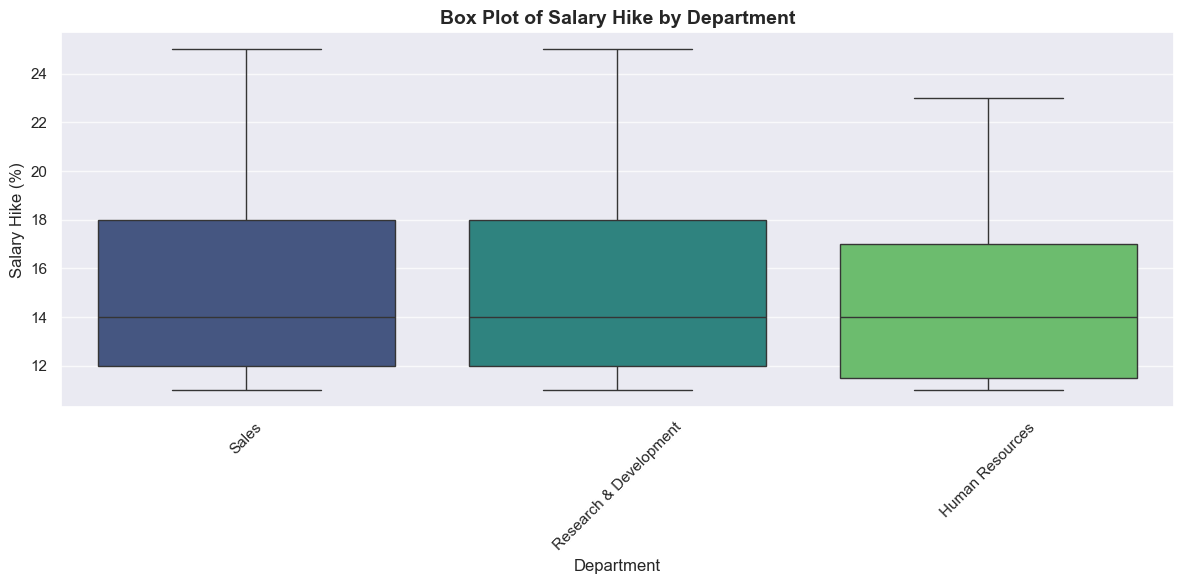

In [271]:
df = pd.DataFrame(data)

# Box plot of Salary Hike by Department
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='PercentSalaryHike', data=df, palette='viridis')

# Chart enhancements
plt.title('Box Plot of Salary Hike by Department', fontsize=14, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Salary Hike (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout to fit all elements

plt.show()

### ___ Bar Plot of Average Salary Hikes by Job Role

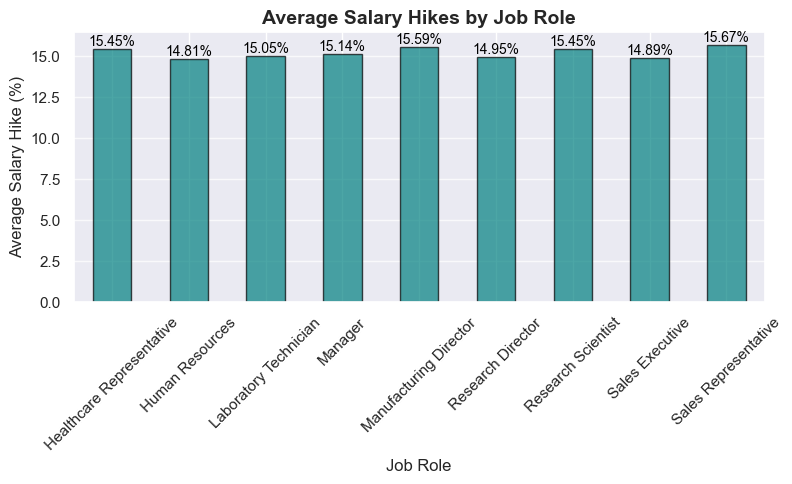

In [250]:
df = pd.DataFrame(data)

# Average Salary Hike by Job Role
avg_hike = df.groupby('JobRole')['PercentSalaryHike'].mean()

# Bar plot with value annotations
plt.figure(figsize=(8, 5))
bars = avg_hike.plot(kind='bar', color='teal', alpha=0.7, edgecolor='black')

# Adding value annotations above the bars
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}%', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10, color='black')

# Chart design enhancements
plt.title('Average Salary Hikes by Job Role', fontsize=14, fontweight='bold')
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Average Salary Hike (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout to fit all elements

plt.show()

**Box Plot of Salary Hike by Job Role**

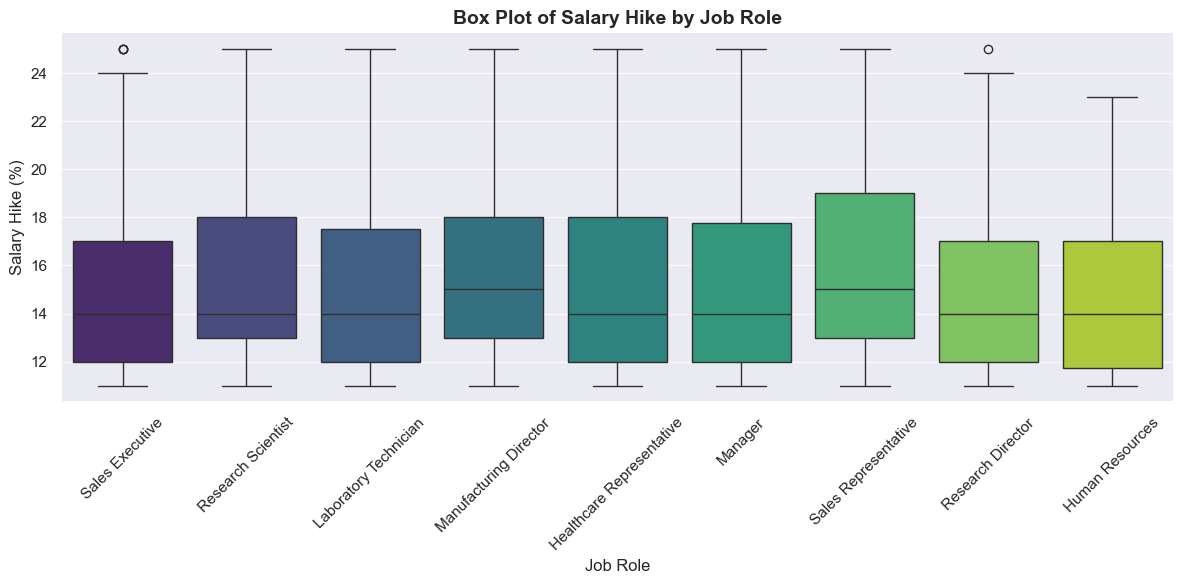

In [285]:
df = pd.DataFrame(data)

# Box plot of Salary Hike by Job Role
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobRole', y='PercentSalaryHike', data=df, palette='viridis')

# Chart enhancements
plt.title('Box Plot of Salary Hike by Job Role', fontsize=14, fontweight='bold')
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Salary Hike (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  #

### ___ Facet Grid of Salary Hikes by Experience and years at comapny

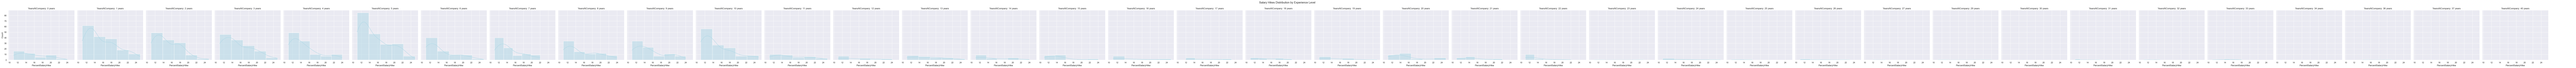

In [247]:
df = pd.DataFrame(data)

# Facet grid of Salary Hikes by Experience and YearsAtCompany
g = sns.FacetGrid(df, col='YearsAtCompany', height=5, aspect=1)
g.map(sns.histplot, 'PercentSalaryHike', bins=5, kde=True, color='lightblue')
g.set_titles(col_template="YearsAtCompany: {col_name} years")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Salary Hikes Distribution by Experience Level')
plt.show()

#


# Data Cleaning

**Unnecessary_Columns:**
* EmployeeCount: Likely a constant value for all rows, which won't contribute to the model.
* EmployeeNumber: This is an identifier and has no predictive value for attrition.
* Over18: Assuming all employees are over 18, this column won't add value to the prediction.
* StandardHours: If this is the same for all employees, it won't provide meaningful information for the model.

In [383]:
#These fields does not add value, hence removed
columns_to_remove = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
data = data.drop(columns=columns_to_remove)

**Note** : can be convert to categorical - BusinessTravel,Gender,MaritalStatus,OverTime


### ___Converting columns to catagorical data 

**Business Travel to Categorical**

In [384]:
mapping = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}
data['BusinessTravel'] = data['BusinessTravel'].map(mapping).astype('category')
data.head(2)

Index  Age Attrition BusinessTravel  DailyRate              Department  \
0      1   41       Yes              1       1102                   Sales   
1      2   49        No              2        279  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   

   Gender  HourlyRate  JobInvolvement  JobLevel             JobRole  \
0  Female          94               3         2     Sales Executive   
1    Male          61               2         2  Research Scientist   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7

### **Perform datatype conversion or translation wherever required**

"Attrition" field has values **Yes/No**, however for machin learning algorithms we need numeric values.
Hence translating **Yes/No** to binary **1/0**

In [385]:
data['Attrition']=data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

### **Convert Categorical values to Numeric Values**

In [386]:
object_data = data.select_dtypes(include=['object'])

# Display information for object data types only
object_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Department      1470 non-null   object
 1   EducationField  1470 non-null   object
 2   Gender          1470 non-null   object
 3   JobRole         1470 non-null   object
 4   MaritalStatus   1470 non-null   object
 5   OverTime        1470 non-null   object
dtypes: object(6)
memory usage: 69.0+ KB


In [387]:
#This function is used to convert Categorical values to Numerical values one-hot encoding
# data=pd.get_dummies(data)
data = pd.get_dummies(data, columns=['Department','EducationField','Gender','MaritalStatus','OverTime','JobRole',], drop_first=True)

In [388]:
data.head(3)

Index  Age  Attrition BusinessTravel  DailyRate  DistanceFromHome  \
0      1   41          1              1       1102                 1   
1      2   49          0              2        279                 8   
2      3   37          1              1       1373                 2   

   Education  EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0          2                        2          94               3         2   
1          1                        3          61               2         2   
2          2                        4          92               2         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   
2                3           2090         2396                   6   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   

   YearsSinceLastPromotion  YearsWithCurrManager  \
0                        0                     5   
1                        1                     7   
2                        0                     0   

   Department_Research & Development  Department_Sales  \
0                              False              True   
1                               True             False   
2                               True             False   

   EducationField_Life Sciences  EducationField_Marketing  \
0                          True                     False   
1                          True                     False   
2                         False                     False   

   EducationField_Medical  EducationField_Other  \
0                   False                 False   
1                   False                 False   
2                   False                  True   

   EducationField_Technical Degree  Gender_Male  MaritalStatus_Married  \
0                            False        False                  False   
1                            False         True                   True   
2                            False         True                  False   

   MaritalStatus_Single  OverTime_Yes  JobRole_Human Resources  \
0                  True          True                    False   
1                 False         False                    False   
2                  True          True                    False   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                           True            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                     True   
1                        True                    False   
2                       False                    False   

   JobRole_Sales Representative  
0                         False  
1                         False  
2                         False

In [389]:
data = data.replace({True: 1, False: 0})
data.head(2)

Index  Age  Attrition BusinessTravel  DailyRate  DistanceFromHome  \
0      1   41          1              1       1102                 1   
1      2   49          0              2        279                 8   

   Education  EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0          2                        2          94               3         2   
1          1                        3          61               2         2   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  \
0                        0                     5   
1                        1                     7   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   

   EducationField_Technical Degree  Gender_Male  MaritalStatus_Married  \
0                                0            0                      0   
1                                0            1                      1   

   MaritalStatus_Single  OverTime_Yes  JobRole_Human Resources  \
0                     1             1                        0   
1                     0             0                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   

   JobRole_Sales Representative  
0                             0  
1                             0

**COMMENT:** It can be seen from the difference in the output of **data.head()** before and after the coversion that now **ALL the fields have numerical values.**

### Checking Correltation

In [390]:

correlation_matrix = data.corr()

# Use Styler to highlight correlations greater than 0.20
def highlight_corr(val):
    color = 'background-color: yellow' if np.abs(val) > 0.20 else ''
    return color

# Apply the styling function
styled_corr_matrix = correlation_matrix.style.applymap(highlight_corr)

# Display the styled DataFrame
styled_corr_matrix


In [358]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Set the figure size
# plt.figure(figsize=(20, 15))

# # Calculate the correlation matrix
# corr_matrix = data.corr()

# # Create a mask to show only correlations above 0.20 or below -0.20
# mask = (corr_matrix < 0.50) & (corr_matrix > -0.50)

# # Exclude self-correlation (correlation of 1)
# mask = mask & (corr_matrix != 1.000000)

# # Set the values of the masked correlations to NaN so they won't appear on the heatmap
# corr_matrix_filtered = corr_matrix.mask(mask)

# # Create the heatmap with larger annotations and formatted correlation values
# sns.heatmap(corr_matrix_filtered, cmap="YlGnBu", annot=True, fmt='.2f', annot_kws={"size": 12}, vmin=-1, vmax=1, center=0)

# # Rotate the X-axis labels for better readability and increase the font size
# plt.xticks(rotation=45, ha='right', fontsize=12)
# plt.yticks(fontsize=12)

# # Adjust layout to avoid overlap
# plt.tight_layout()

# # Display the plot
# plt.show()


### **Selecting the importance feature after checcking the feature importance, co-relation**

In [391]:
imp_features = [
    'Index', 'MonthlyIncome', 'DailyRate', 'MonthlyRate', 'Age', 
    'DistanceFromHome', 'HourlyRate', 'TotalWorkingYears', 'YearsWithCurrManager', 
    'YearsAtCompany', 'NumCompaniesWorked', 'PercentSalaryHike', 
    'EnvironmentSatisfaction', 'OverTime_Yes', 'JobSatisfaction', 
    'StockOptionLevel', 'JobInvolvement', 'RelationshipSatisfaction', 
    'YearsSinceLastPromotion', 'BusinessTravel', 'YearsInCurrentRole', 
    'TrainingTimesLastYear', 'WorkLifeBalance', 'Education', 'Gender_Male', 
    'MaritalStatus_Single', 'JobRole_Laboratory Technician', 
    'EducationField_Technical Degree', 'Department_Research & Development', 
    'MaritalStatus_Married', 'JobRole_Sales Executive', 'JobLevel','Attrition'
]

data = data[imp_features]

# Training and modelling 

### **Separating the Feature and Target Matrices**

In [392]:
#Separating Feature and Target matrices
X = data.drop(['Attrition'], axis=1)
y=data['Attrition']

In [393]:
X.head(2)

Index  MonthlyIncome  DailyRate  MonthlyRate  Age  DistanceFromHome  \
0      1           5993       1102        19479   41                 1   
1      2           5130        279        24907   49                 8   

   HourlyRate  TotalWorkingYears  YearsWithCurrManager  YearsAtCompany  \
0          94                  8                     5               6   
1          61                 10                     7              10   

   NumCompaniesWorked  PercentSalaryHike  EnvironmentSatisfaction  \
0                   8                 11                        2   
1                   1                 23                        3   

   OverTime_Yes  JobSatisfaction  StockOptionLevel  JobInvolvement  \
0             1                4                 0               3   
1             0                2                 1               2   

   RelationshipSatisfaction  YearsSinceLastPromotion BusinessTravel  \
0                         1                        0              1   
1                         4                        1              2   

   YearsInCurrentRole  TrainingTimesLastYear  WorkLifeBalance  Education  \
0                   4                      0                1          2   
1                   7                      3                3          1   

   Gender_Male  MaritalStatus_Single  JobRole_Laboratory Technician  \
0            0                     1                              0   
1            1                     0                              0   

   EducationField_Technical Degree  Department_Research & Development  \
0                                0                                  0   
1                                0                                  1   

   MaritalStatus_Married  JobRole_Sales Executive  JobLevel  
0                      0                        1         2  
1                      1                        0         2

In [363]:
y.head(2)

0    1
1    0
Name: Attrition, dtype: int64

### **Scaling the data values to standardize the range of independent variables**

In [394]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

### **Split the data into Training set and Testing set**

In [395]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state=42)
X_test.shape

(441, 32)

In [396]:
y_test.head(3)

1041    0
184     0
1222    1
Name: Attrition, dtype: int64

### **Function definition**

In [397]:
# Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)  # Train the Model
    y_pred = model.predict(X_test)  # Use the Model for prediction

    # Test the Model
    cm = confusion_matrix(y_test, y_pred)
    accuracy = round(100 * np.trace(cm) / np.sum(cm), 1)

    # Plot/Display the results
    cm_plot(cm, model)
    print('Accuracy of the Model', model.__class__.__name__, str(accuracy) + '%')

# Function to plot Confusion Matrix
def cm_plot(cm, model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative', 'Positive']
    plt.title('Comparison of Prediction Result for ' + model.__class__.__name__)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]))
    plt.show()

### **PERFORM PREDICTIONS USING MACHINE LEARNING ALGORITHMS**

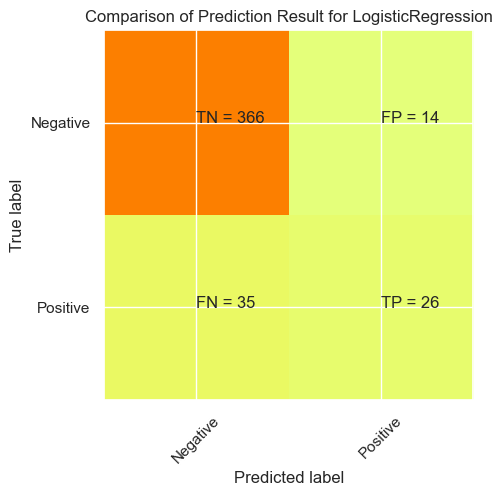

Accuracy of the Model LogisticRegression 88.9%


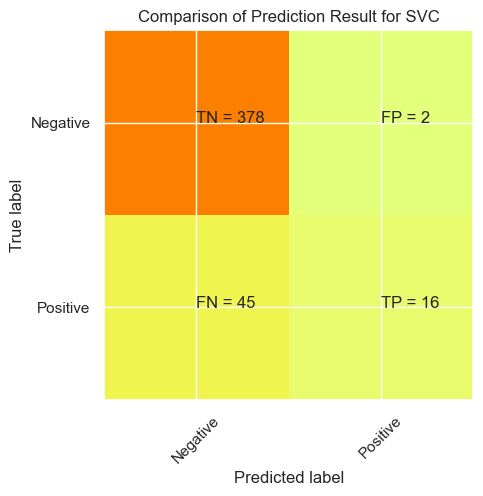

Accuracy of the Model SVC 89.3%


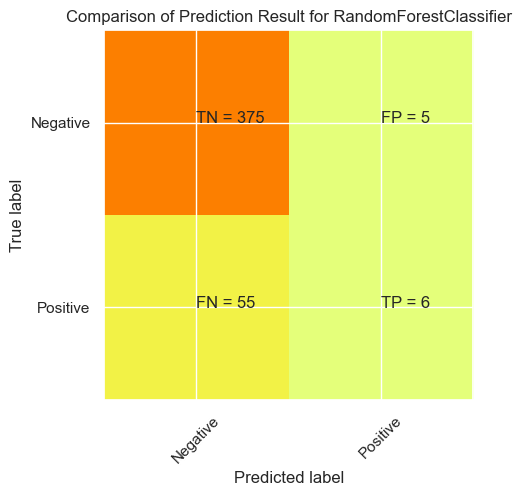

Accuracy of the Model RandomForestClassifier 86.4%


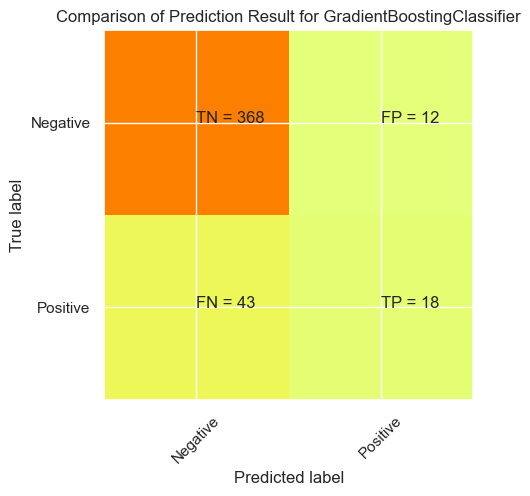

Accuracy of the Model GradientBoostingClassifier 87.5%


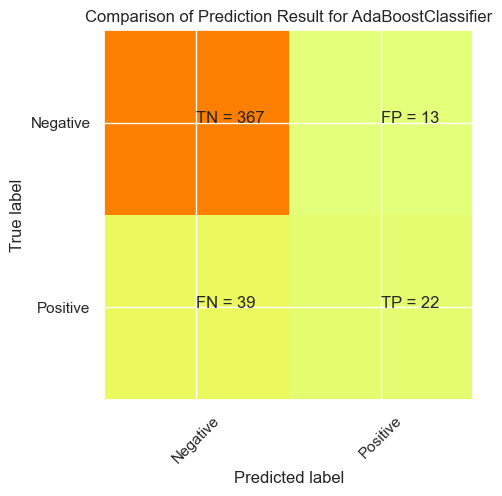

Accuracy of the Model AdaBoostClassifier 88.2%


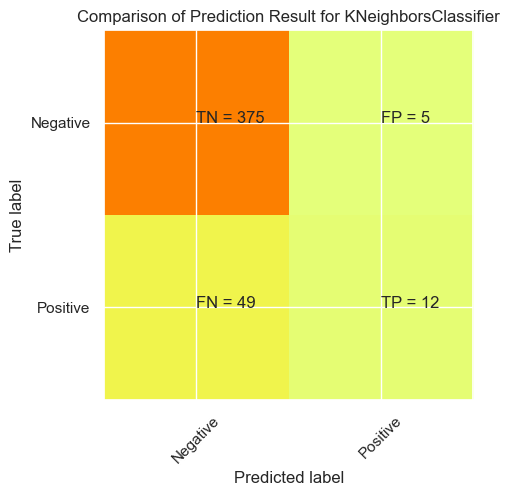

Accuracy of the Model KNeighborsClassifier 87.8%


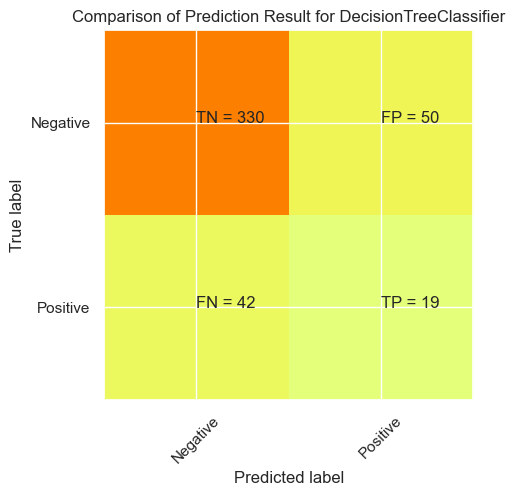

Accuracy of the Model DecisionTreeClassifier 79.1%


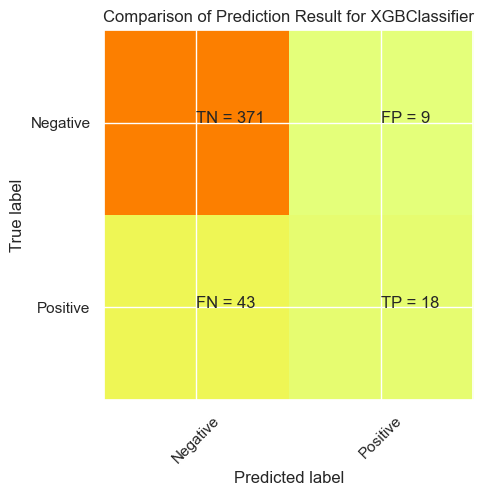

Accuracy of the Model XGBClassifier 88.2%


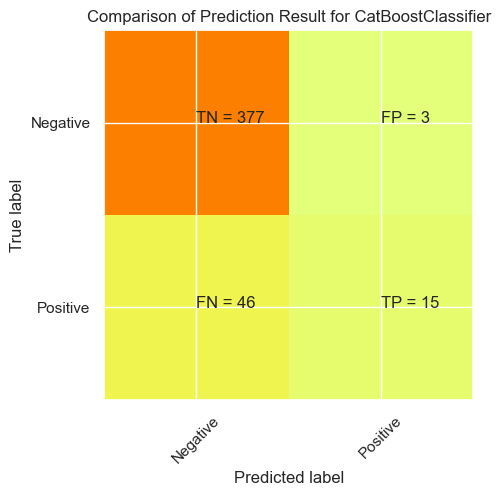

Accuracy of the Model CatBoostClassifier 88.9%
[LightGBM] [Info] Number of positive: 176, number of negative: 853
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1396
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171040 -> initscore=-1.578276
[LightGBM] [Info] Start training from score -1.578276


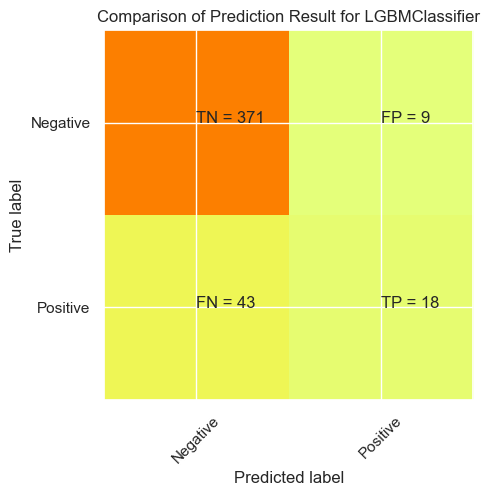

Accuracy of the Model LGBMClassifier 88.2%


In [398]:
model_dict = {
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoostClassifier": CatBoostClassifier(verbose=0),
    "LGBMClassifier": LGBMClassifier()
}

# Testing all models
for model_name, model in model_dict.items():
    train_test_ml_model(X_train, y_train, X_test, y_test, model)

In [399]:
for name, model in model_dict.items():
    print(f"Default parameters for {name}:")
    print(model.get_params())
    print()

Default parameters for LogisticRegression:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Default parameters for SVC:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Default parameters for RandomForestClassifier:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators':

## Hyper paramter tuning

In [ ]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split

# lgbm = LGBMClassifier()

# # Define hyperparameters to tune
# param_grid = {
#     'n_estimators': [50,100, 200],
#     'learning_rate': [0.05, 0.1,0.2],
#     'num_leaves': [31, 50, 70],
#     'max_depth': [-2,-1, 10, 20],
#     'subsample':[0.7, 0.8, 0.9,1.0,1.1,1.2]
# }
# # param_grid = {
# #     'n_estimators': [50,100, 200],
# #     'learning_rate': [0.05, 0.1,0.2],
# #     'num_leaves': [31, 50, 70],
# #     'max_depth': [-2,-1, 10, 20],
# #     'subsample': [0.7, 0.8, 0.9,1.0,1.1,1.2],
# #     'colsample_bytree': [0.7, 0.8, 0.9,1.0,1.1,1.2],
# #     'min_child_samples': [10, 20, 30],
# #     'min_child_weight': [0.001, 0.01, 0.1],
# #     'reg_alpha': [0.0, 0.1, 1],
# #     'reg_lambda': [0.0, 0.1, 1]
# # }
# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best accuracy score: ", grid_search.best_score_)

# # Evaluate on test data
# best_model = grid_search.best_estimator_ 
# y_pred = best_model.predict(X_test)
# print(classification_report(y_test, y_pred))

In [403]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import confusion_matrix, accuracy_score

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'C': [0.1, 1, 10, 100],          # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
#     'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],    # Kernel coefficient
#     'degree': [2, 3, 4],              # Degree for 'poly' kernel
#     'class_weight': [None, 'balanced']  # Balance the dataset if needed
# }

# # Initialize the SVC model
# svc = SVC()

# # GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(
#     estimator=svc,
#     param_grid=param_grid,
#     cv=5,             # 5-fold cross-validation
#     scoring='accuracy',  # You can use other metrics like 'f1' or 'roc_auc'
#     verbose=2,
#     n_jobs=-1         # Use all available cores
# )

# # Fit the model on the training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Predict using the best model
# y_pred = best_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Display results
# print(f"Best Parameters: {best_params}")
# print(f"Accuracy of the Tuned Model: {accuracy * 100:.2f}%")
# print(f"Confusion Matrix: \n{conf_matrix}")

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Parameters: {'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy of the Tuned Model: 88.89%
Confusion Matrix: 
[[366  14]
 [ 35  26]]


## __Select LGBMClassifier() as best model

In [407]:
X = data.drop(columns=['Attrition'])  # Drop the target column from features
y = data['Attrition']  # Target column


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the LGBMClassifier
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.17%


## 

### __Feature importance

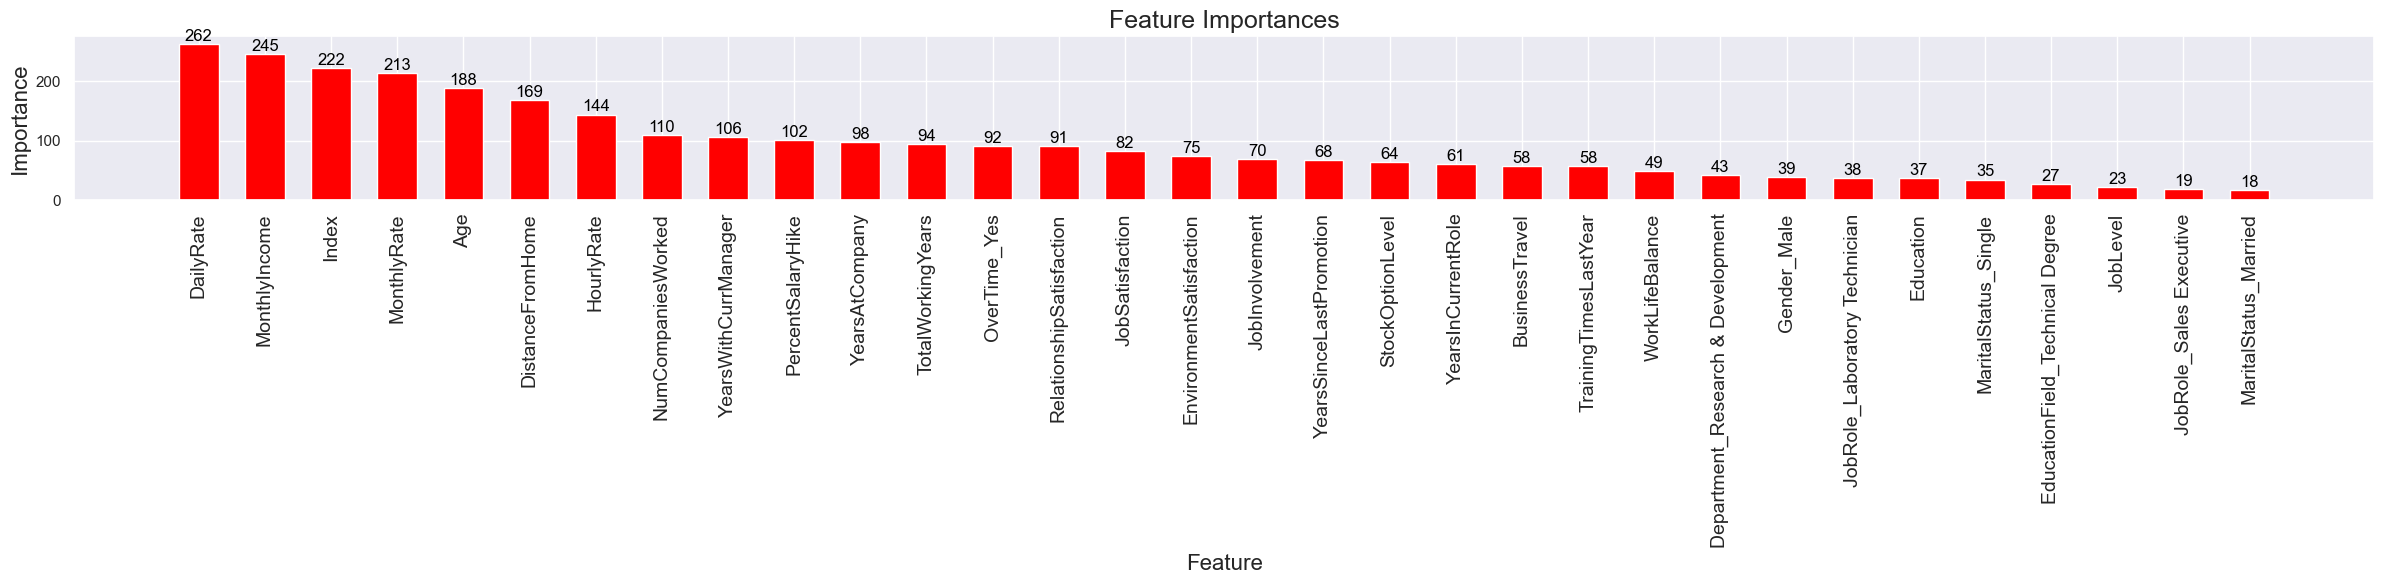

In [373]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data (replace with your actual feature importances)
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances with improved visuals
plt.figure(figsize=(24, 6))  # Increased height for better spacing
bars = plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='red', width=0.6)
plt.ylabel('Importance', fontsize=16)
plt.xlabel('Feature', fontsize=16)
plt.title('Feature Importances', fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.tight_layout()

# Add value labels on the bars with padding and rounded to zero decimal points
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.02, f'{int(height)}',  # Rounded to zero decimal points
             ha='center', va='bottom', fontsize=12, color='black')

plt.show()


### __Saving test data for dashboard

In [408]:
Test_data = pd.concat([X_test, y_test], axis=1)
Test_data.head(2)

Index  MonthlyIncome  DailyRate  MonthlyRate  Age  DistanceFromHome  \
1041   1042           8463        866        23490   28                 5   
184     185           4450       1084        26250   53                13   

      HourlyRate  TotalWorkingYears  YearsWithCurrManager  YearsAtCompany  \
1041          84                  6                     3               5   
184           57                  5                     3               4   

      NumCompaniesWorked  PercentSalaryHike  EnvironmentSatisfaction  \
1041                   0                 18                        4   
184                    1                 11                        4   

      OverTime_Yes  JobSatisfaction  StockOptionLevel  JobInvolvement  \
1041             0                1                 0               3   
184              0                1                 2               4   

      RelationshipSatisfaction  YearsSinceLastPromotion BusinessTravel  \
1041                         4                        1              1   
184                          3                        1              1   

      YearsInCurrentRole  TrainingTimesLastYear  WorkLifeBalance  Education  \
1041                   4                      4                3          3   
184                    2                      3                3          2   

      Gender_Male  MaritalStatus_Single  JobRole_Laboratory Technician  \
1041            1                     1                              0   
184             0                     0                              0   

      EducationField_Technical Degree  Department_Research & Development  \
1041                                0                                  0   
184                                 0                                  1   

      MaritalStatus_Married  JobRole_Sales Executive  JobLevel  Attrition  
1041                      0                        1         2          0  
184                       0                        0         2          0

In [409]:
Test_data.shape

(441, 33)

In [410]:
data_main  = data_main[data_main.index.isin(Test_data.index)]
data_main.shape

(441, 32)

In [62]:
Test_data.to_excel("modelled Test data.xlsx")
data_main.to_excel("attrition test data.xlsx")

#

#

# Shapash

In [63]:
import shapash
from shapash.explainer.smart_explainer import SmartExplainer
from shapash import SmartExplainer

In [64]:
X_test.head(2)

index  Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
1041   1041   28        866                 5          3            1469   
184     184   53       1084                13          2             250   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
1041                        4          84               3         2   
184                         4          57               4         2   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
1041                1           8463        23490                   0   
184                 1           4450        26250                   1   

      PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1041                 18                  3                         4   
184                  11                  3                         3   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1041             80                 0                  6   
184              80                 2                  5   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1041                      4                3               5   
184                       3                3               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
1041                   4                        1                     3   
184                    2                        1                     3   

      BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
1041                          0                                 0   
184                           0                                 0   

      BusinessTravel_Travel_Rarely  Department_Human Resources  \
1041                             1                           0   
184                              1                           0   

      Department_Research & Development  Department_Sales  \
1041                                  0                 1   
184                                   1                 0   

      EducationField_Human Resources  EducationField_Life Sciences  \
1041                               0                             0   
184                                0                             0   

      EducationField_Marketing  EducationField_Medical  EducationField_Other  \
1041                         0                       1                     0   
184                          0                       1                     0   

      EducationField_Technical Degree  Gender_Female  Gender_Male  \
1041                                0              0            1   
184                                 0              1            0   

      JobRole_Healthcare Representative  JobRole_Human Resources  \
1041                                  0                        0   
184                                   0                        0   

      JobRole_Laboratory Technician  JobRole_Manager  \
1041                              0                0   
184                               0                0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
1041                               0                          0   
184                                1                          0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
1041                           0                        1   
184                            0                        0   

      JobRole_Sales Representative  MaritalStatus_Divorced  \
1041                             0                       0   
184                              0                       1   

      MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
1041                      0                     1            1             0  
184                       0                     0            1             0

In [65]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [66]:
# y_pred_series = pd.Series(y_pred, index=X_test.index)
y_pred_df = pd.DataFrame(y_pred, index=X_test.index, columns=['y_pred'])
y_pred_df.head()

y_pred
1041       0
184        0
1222       0
67         0
220        0

In [67]:
y_test.head(2)

1041    0
184     0
Name: Attrition, dtype: int64

In [68]:
explainer = SmartExplainer(model=model)

# Compile the explainer with the test dataset
explainer.compile(
    x=X_test,  # Test data with feature names
    y_pred=y_pred_df,  # Predictions as a pd.Series with the same index
    y_target=y_test  # True target labels
)


INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x000001C9BD9C5FA0>


In [69]:
app = explainer.run_app(title_story='Attrition Project')


INFO:root:Your Shapash application run on http://LAPTOP-TR8O0CUL:8050/
INFO:root:Use the method .kill() to down your app.
Exception in thread Thread-8 (<lambda>):
Traceback (most recent call last):
  File "C:\Users\Ramji\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connection.py", line 196, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ramji\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    raise err
  File "C:\Users\Ramji\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    sock.connect(sa)
OSError: [WinError 10049] The requested address is not valid in its context

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Ramji\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connec

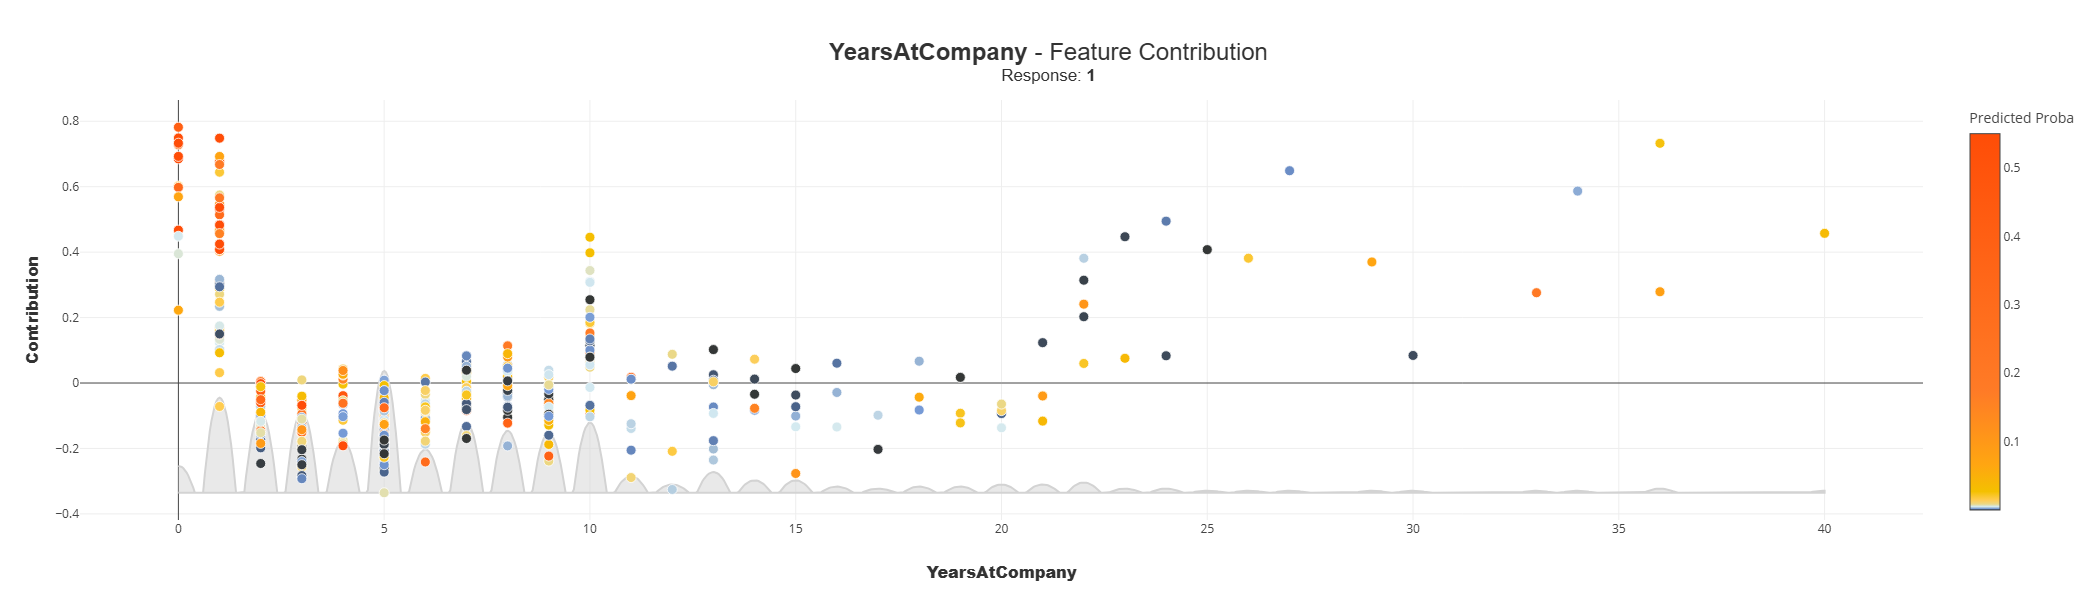

In [148]:
explainer.plot.features_importance()

# Display contribution plot for a specific feature (e.g., 'Age')
explainer.plot.contribution_plot(col='YearsAtCompany')  # Replace 'Age' with the feature you want to plot


In [149]:
app.kill()

## exporting Local Explaination to df

In [159]:
Summary_df = explainer.to_pandas(max_contrib=21)

In [160]:
Summary_df.head(2)

y_pred       feature_1 value_1 contribution_1        feature_2 value_2  \
1041       0     OverTime_No     1.0       0.617343  JobSatisfaction     1.0   
184        0  JobInvolvement     4.0       1.013615      OverTime_No     1.0   

     contribution_2         feature_3  value_3 contribution_3  \
1041      -0.560571       MonthlyRate  23490.0      -0.551967   
184        0.557625  StockOptionLevel      2.0       0.555685   

             feature_4  value_4 contribution_4         feature_5 value_5  \
1041  DistanceFromHome      5.0       0.461261  StockOptionLevel     0.0   
184        MonthlyRate  26250.0      -0.484874   JobSatisfaction     1.0   

     contribution_5           feature_6 value_6 contribution_6  \
1041      -0.347579           DailyRate   866.0       0.286063   
184       -0.399523  NumCompaniesWorked     1.0       0.321961   

                    feature_7 value_7 contribution_7             feature_8  \
1041  EnvironmentSatisfaction     4.0       0.263099  YearsWithCurrManager   
184          DistanceFromHome    13.0      -0.316542     PercentSalaryHike   

     value_8 contribution_8               feature_9 value_9 contribution_9  \
1041     3.0       0.252801           MonthlyIncome  8463.0      -0.248191   
184     11.0      -0.285328  MaritalStatus_Divorced     1.0       0.271096   

                   feature_10 value_10 contribution_10  \
1041     MaritalStatus_Single      1.0       -0.237553   
184   EnvironmentSatisfaction      4.0        0.264863   

                    feature_11 value_11 contribution_11         feature_12  \
1041  RelationshipSatisfaction      4.0        0.230129     YearsAtCompany   
184         YearsInCurrentRole      2.0       -0.163067  TotalWorkingYears   

     value_12 contribution_12            feature_13 value_13 contribution_13  \
1041      5.0        0.227553                 index   1041.0         0.20113   
184       5.0        -0.15824  YearsWithCurrManager      3.0        0.155559   

              feature_14 value_14 contribution_14       feature_15 value_15  \
1041  NumCompaniesWorked      0.0        0.197836       HourlyRate     84.0   
184                index    184.0        0.149611  WorkLifeBalance      3.0   

     contribution_15               feature_16 value_16 contribution_16  \
1041       -0.149439  JobRole_Sales Executive      1.0       -0.147267   
184         0.142782            MonthlyIncome   4450.0        0.118169   

                            feature_17 value_17 contribution_17  \
1041  BusinessTravel_Travel_Frequently      0.0        0.125394   
184   BusinessTravel_Travel_Frequently      0.0        0.096886   

                   feature_18 value_18 contribution_18 feature_19 value_19  \
1041  YearsSinceLastPromotion      1.0        0.123409        Age     28.0   
184      MaritalStatus_Single      0.0        0.092634   JobLevel      2.0   

     contribution_19              feature_20 value_20 contribution_20  \
1041       -0.111679       PercentSalaryHike     18.0       -0.110033   
184         0.086979  EducationField_Medical      1.0       -0.084986   

                             feature_21 value_21 contribution_21  
1041  Department_Research & Development      0.0       -0.103408  
184                       Gender_Female      1.0        0.082764

In [161]:
Summary_df = Summary_df.reset_index()
Summary_df.head(2)

index  y_pred       feature_1 value_1 contribution_1        feature_2  \
0   1041       0     OverTime_No     1.0       0.617343  JobSatisfaction   
1    184       0  JobInvolvement     4.0       1.013615      OverTime_No   

  value_2 contribution_2         feature_3  value_3 contribution_3  \
0     1.0      -0.560571       MonthlyRate  23490.0      -0.551967   
1     1.0       0.557625  StockOptionLevel      2.0       0.555685   

          feature_4  value_4 contribution_4         feature_5 value_5  \
0  DistanceFromHome      5.0       0.461261  StockOptionLevel     0.0   
1       MonthlyRate  26250.0      -0.484874   JobSatisfaction     1.0   

  contribution_5           feature_6 value_6 contribution_6  \
0      -0.347579           DailyRate   866.0       0.286063   
1      -0.399523  NumCompaniesWorked     1.0       0.321961   

                 feature_7 value_7 contribution_7             feature_8  \
0  EnvironmentSatisfaction     4.0       0.263099  YearsWithCurrManager   
1         DistanceFromHome    13.0      -0.316542     PercentSalaryHike   

  value_8 contribution_8               feature_9 value_9 contribution_9  \
0     3.0       0.252801           MonthlyIncome  8463.0      -0.248191   
1    11.0      -0.285328  MaritalStatus_Divorced     1.0       0.271096   

                feature_10 value_10 contribution_10                feature_11  \
0     MaritalStatus_Single      1.0       -0.237553  RelationshipSatisfaction   
1  EnvironmentSatisfaction      4.0        0.264863        YearsInCurrentRole   

  value_11 contribution_11         feature_12 value_12 contribution_12  \
0      4.0        0.230129     YearsAtCompany      5.0        0.227553   
1      2.0       -0.163067  TotalWorkingYears      5.0        -0.15824   

             feature_13 value_13 contribution_13          feature_14 value_14  \
0                 index   1041.0         0.20113  NumCompaniesWorked      0.0   
1  YearsWithCurrManager      3.0        0.155559               index    184.0   

  contribution_14       feature_15 value_15 contribution_15  \
0        0.197836       HourlyRate     84.0       -0.149439   
1        0.149611  WorkLifeBalance      3.0        0.142782   

                feature_16 value_16 contribution_16  \
0  JobRole_Sales Executive      1.0       -0.147267   
1            MonthlyIncome   4450.0        0.118169   

                         feature_17 value_17 contribution_17  \
0  BusinessTravel_Travel_Frequently      0.0        0.125394   
1  BusinessTravel_Travel_Frequently      0.0        0.096886   

                feature_18 value_18 contribution_18 feature_19 value_19  \
0  YearsSinceLastPromotion      1.0        0.123409        Age     28.0   
1     MaritalStatus_Single      0.0        0.092634   JobLevel      2.0   

  contribution_19              feature_20 value_20 contribution_20  \
0       -0.111679       PercentSalaryHike     18.0       -0.110033   
1        0.086979  EducationField_Medical      1.0       -0.084986   

                          feature_21 value_21 contribution_21  
0  Department_Research & Development      0.0       -0.103408  
1                      Gender_Female      1.0        0.082764

In [162]:
# Summary_df.to_excel('summary_explanations.xlsx', index=True, index_label='Index')
Summary_df.to_excel('summary_explanations.xlsx')

In [164]:
Summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            441 non-null    int64 
 1   y_pred           441 non-null    int64 
 2   feature_1        441 non-null    object
 3   value_1          441 non-null    object
 4   contribution_1   441 non-null    object
 5   feature_2        441 non-null    object
 6   value_2          441 non-null    object
 7   contribution_2   441 non-null    object
 8   feature_3        441 non-null    object
 9   value_3          441 non-null    object
 10  contribution_3   441 non-null    object
 11  feature_4        441 non-null    object
 12  value_4          441 non-null    object
 13  contribution_4   441 non-null    object
 14  feature_5        441 non-null    object
 15  value_5          441 non-null    object
 16  contribution_5   441 non-null    object
 17  feature_6        441 non-null    ob

In [165]:
Summary_df = Summary_df.sort_values(by='index', ascending=True)
Summary_df.head(2)

index  y_pred       feature_1 value_1 contribution_1         feature_2  \
423     10       0  JobInvolvement     4.0       1.276442       OverTime_No   
117     15       0  JobInvolvement     4.0       1.117532  StockOptionLevel   

    value_2 contribution_2         feature_3 value_3 contribution_3  \
423     1.0       1.166812  DistanceFromHome    16.0      -0.914045   
117     1.0       1.002123     MonthlyIncome  9980.0      -0.554941   

                  feature_4 value_4 contribution_4         feature_5 value_5  \
423           MonthlyIncome  2426.0      -0.736853  StockOptionLevel     1.0   
117  MaritalStatus_Divorced     1.0       0.516861       OverTime_No     1.0   

    contribution_5             feature_6 value_6 contribution_6  \
423       0.557004  YearsWithCurrManager     3.0        0.34969   
117       0.485256             DailyRate  1389.0       0.390519   

                   feature_7 value_7 contribution_7           feature_8  \
423  EnvironmentSatisfaction     1.0      -0.290503      EmployeeNumber   
117         DistanceFromHome    21.0       -0.35066  NumCompaniesWorked   

    value_8 contribution_8        feature_9 value_9 contribution_9  \
423    14.0      -0.256995              Age    35.0       0.212558   
117     1.0        0.34267  JobSatisfaction     1.0      -0.302968   

             feature_10 value_10 contribution_10      feature_11 value_11  \
423  NumCompaniesWorked      0.0         0.21116  YearsAtCompany      5.0   
117  YearsInCurrentRole      9.0          0.3023             Age     29.0   

    contribution_11         feature_12 value_12 contribution_12  \
423        0.152901    WorkLifeBalance      3.0        0.147188   
117       -0.278918  PercentSalaryHike     11.0       -0.242508   

                  feature_13 value_13 contribution_13            feature_14  \
423                 JobLevel      1.0       -0.121212  MaritalStatus_Single   
117  YearsSinceLastPromotion      8.0       -0.233104  YearsWithCurrManager   

    value_14 contribution_14                       feature_15 value_15  \
423      0.0        0.117117  EducationField_Technical Degree      0.0   
117      8.0        0.140811                      MonthlyRate  10195.0   

    contribution_15                    feature_16 value_16 contribution_16  \
423        0.114009  EducationField_Life Sciences      0.0       -0.105069   
117        0.133918                EmployeeNumber     20.0       -0.131215   

                        feature_17 value_17 contribution_17  \
423  JobRole_Laboratory Technician      1.0       -0.103172   
117   EducationField_Life Sciences      1.0        0.123569   

                   feature_18 value_18 contribution_18  \
423  RelationshipSatisfaction      3.0        0.094982   
117            YearsAtCompany     10.0        -0.11506   

                  feature_19 value_19 contribution_19  \
423                    index     10.0       -0.085799   
117  EnvironmentSatisfaction      2.0       -0.111951   

                          feature_20 value_20 contribution_20  \
423           MaritalStatus_Divorced      0.0       -0.080537   
117  EducationField_Technical Degree      0.0        0.106273   

                           feature_21 value_21 contribution_21  
423  BusinessTravel_Travel_Frequently      0.0        0.073954  
117                   WorkLifeBalance      3.0        0.097583

In [167]:
rows = []
for Index, row in Summary_df.iterrows():
    y_pred = row['y_pred']
    index_val = row['index']
    # Loop through each feature-value-contribution set
    for i in range(1, 21):  # Adjust the range if you have more feature-value-contribution sets
        feature = row[f'feature_{i}']
        value = row[f'value_{i}']
        contribution = row[f'contribution_{i}']
        rows.append([index_val, y_pred, feature, value, contribution])

# Create a new DataFrame from the list of rows
reshaped_df = pd.DataFrame(rows, columns=['Index', 'y_pred', 'feature', 'value', 'contribution'])

# Save or print the reshaped DataFrame
reshaped_df.head(3)

Index  y_pred           feature  value  contribution
0     10       0    JobInvolvement    4.0      1.276442
1     10       0       OverTime_No    1.0      1.166812
2     10       0  DistanceFromHome   16.0     -0.914045

In [168]:
reshaped_df.to_excel('Summary_df_reshaped.xlsx')


# 

# LIME

In [76]:
import lime
import lime.lime_tabular

Intercept 0.2108144812417384
Prediction_local [0.03541315]
Right: 0.013588023583677696


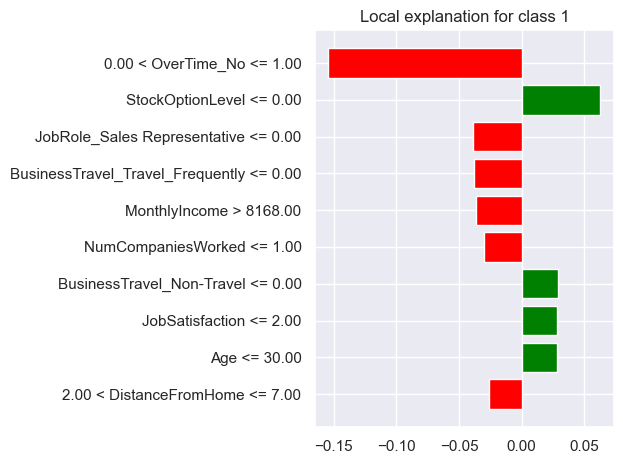

In [78]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,  # Use the training data for fitting the explainer
    feature_names=X_train.columns,  # Feature names from the training data
    discretize_continuous=True, 
    mode='classification',  # Use 'classification' for classification tasks
    verbose=True, 
    random_state=42
)

# Select an instance from the test set to explain
instance_to_explain = X_test.iloc[0]  # Change index if needed

# Get the model's prediction probabilities for the selected instance
def predict_proba_fn(x):
    return model.predict_proba(x)

# Explain the selected instance
exp = explainer.explain_instance(
    instance_to_explain.values,  # Features of the instance to explain
    predict_proba_fn,  # Model's prediction probability function
    num_features=10  # Number of features to show in the explanation
)

# Plot the local explanation
plt = exp.as_pyplot_figure()
plt.tight_layout()

# Display the explanation
exp.show_in_notebook(show_table=True)

# 

# Shap

In [80]:
# import shap
# import matplotlib.pyplot as plt
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Define your feature and target variables
# X = data.drop(columns=['Attrition'])  # Drop the target column from features
# y = data['Attrition']  # Target column

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the LGBMClassifier
# model = LGBMClassifier()

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")

# # Initialize the SHAP explainer
# explainer = shap.Explainer(model, X_train)

# # Explain the predictions on the test set
# shap_values = explainer(X_test)

# # Plot SHAP values for the entire test set
# shap.summary_plot(shap_values, X_test)

# # Plot SHAP values for a specific instance (e.g., the first instance)
# # Use shap.force_plot with explainer.expected_value and the SHAP values
# shap.initjs()  # Initialize JavaScript visualization for Jupyter notebooks
# shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0], matplotlib=True)
# plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1418
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168367 -> initscore=-1.597243
[LightGBM] [Info] Start training from score -1.597243
Accuracy: 87.41%


AttributeError: 'TreeEnsemble' object has no attribute 'values'

# Prediction probability

In [169]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics


In [170]:
print(metrics.classification_report(y_test,y_pred_df,digits=3))

              precision    recall  f1-score   support

           0      0.892     0.979     0.934       380
           1      0.667     0.262     0.376        61

    accuracy                          0.880       441
   macro avg      0.779     0.621     0.655       441
weighted avg      0.861     0.880     0.856       441



In [171]:
y_test

1041    0
184     0
1222    1
67      0
220     0
494     0
430     0
240     0
218     0
49      0
665     0
926     0
617     0
361     0
1423    0
1244    0
1250    0
752     1
271     1
1055    0
259     1
428     0
1026    0
277     0
1105    0
1116    0
670     0
619     0
1046    0
247     0
1259    0
733     0
582     0
464     0
1236    1
704     0
1040    0
864     1
51      1
1307    0
168     0
1094    0
1113    0
765     0
363     1
261     0
946     1
591     1
528     1
892     1
429     0
309     0
123     0
964     0
1219    0
881     0
203     0
1398    0
549     0
1159    0
1243    0
777     1
1033    1
588     0
744     1
192     1
339     0
1344    0
289     0
1096    0
1355    0
29      0
486     0
76      0
903     0
65      0
1146    0
583     0
882     0
948     0
858     0
551     0
1374    0
478     0
836     1
1042    0
1196    0
493     0
626     0
44      0
59      0
23      0
1403    0
381     0
115     0
342     0
1063    0
398     0
1067    0
433     0


In [172]:
pred_prob = pd.DataFrame(
    model.predict_proba(X_test),
    columns=['0', '1'],
    index=X_test.index  # Retain the index of X_test
)

pred_prob


0         1
1041  0.989214  0.010786
184   0.998673  0.001327
1222  0.841611  0.158389
67    0.998637  0.001363
220   0.996557  0.003443
494   0.628527  0.371473
430   0.988043  0.011957
240   0.992085  0.007915
218   0.977191  0.022809
49    0.990380  0.009620
665   0.804314  0.195686
926   0.906731  0.093269
617   0.993913  0.006087
361   0.966680  0.033320
1423  0.999490  0.000510
1244  0.961044  0.038956
1250  0.891797  0.108203
752   0.995458  0.004542
271   0.990287  0.009713
1055  0.997451  0.002549
259   0.966474  0.033526
428   0.995153  0.004847
1026  0.992002  0.007998
277   0.996811  0.003189
1105  0.999531  0.000469
1116  0.974724  0.025276
670   0.929120  0.070880
619   0.999895  0.000105
1046  0.976122  0.023878
247   0.995218  0.004782
1259  0.995588  0.004412
733   0.999797  0.000203
582   0.999797  0.000203
464   0.994312  0.005688
1236  0.788244  0.211756
704   0.999391  0.000609
1040  0.999758  0.000242
864   0.983973  0.016027
51    0.775885  0.224115
1307  0.999059  0.000941
168   0.957084  0.042916
1094  0.908391  0.091609
1113  0.996921  0.003079
765   0.999394  0.000606
363   0.136335  0.863665
261   0.999445  0.000555
946   0.237721  0.762279
591   0.194255  0.805745
528   0.975938  0.024062
892   0.056611  0.943389
429   0.997271  0.002729
309   0.992153  0.007847
123   0.991063  0.008937
964   0.985472  0.014528
1219  0.988959  0.011041
881   0.992595  0.007405
203   0.915934  0.084066
1398  0.999857  0.000143
549   0.999463  0.000537
1159  0.986402  0.013598
1243  0.993720  0.006280
777   0.104953  0.895047
1033  0.994715  0.005285
588   0.998287  0.001713
744   0.400878  0.599122
192   0.894814  0.105186
339   0.996633  0.003367
1344  0.972576  0.027424
289   0.999766  0.000234
1096  0.979516  0.020484
1355  0.988791  0.011209
29    0.955740  0.044260
486   0.983783  0.016217
76    0.996886  0.003114
903   0.994500  0.005500
65    0.997386  0.002614
1146  0.999663  0.000337
583   0.998131  0.001869
882   0.993824  0.006176
948   0.852465  0.147535
858   0.999916  0.000084
551   0.998119  0.001881
1374  0.994343  0.005657
478   0.987788  0.012212
836   0.991075  0.008925
1042  0.997886  0.002114
1196  0.570228  0.429772
493   0.989810  0.010190
626   0.997199  0.002801
44    0.995742  0.004258
59    0.999663  0.000337
23    0.322250  0.677750
1403  0.987402  0.012598
381   0.840072  0.159928
115   0.996025  0.003975
342   0.989075  0.010925
1063  0.997568  0.002432
398   0.996403  0.003597
1067  0.667458  0.332542
433   0.999501  0.000499
270   0.918639  0.081361
809   0.994693  0.005307
607   0.995928  0.004072
970   0.952221  0.047779
736   0.998922  0.001078
807   0.983922  0.016078
365   0.998916  0.001084
1319  0.215231  0.784769
78    0.994842  0.005158
244   0.998382  0.001618
1167  0.261219  0.738781
1142  0.922163  0.077837
679   0.994255  0.005745
782   0.987322  0.012678
416   0.693911  0.306089
141   0.987165  0.012835
70    0.876978  0.123022
15    0.999246  0.000754
1195  0.999548  0.000452
1066  0.977841  0.022159
1023  0.996167  0.003833
958   0.995191  0.004809
930   0.862944  0.137056
1268  0.990051  0.009949
578   0.887921  0.112079
422   0.061700  0.938300
885   0.981829  0.018171
813   0.996743  0.003257
526   0.994522  0.005478
303   0.991470  0.008530
1318  0.998127  0.001873
1311  0.342360  0.657640
427   0.939457  0.060543
792   0.995954  0.004046
843   0.998896  0.001104
979   0.992255  0.007745
274   0.986288  0.013712
439   0.249314  0.750686
350   0.859254  0.140746
721   0.991142  0.008858
921   0.298257  0.701743
451   0.908524  0.091476
1182  0.999723  0.000277
43    0.990650  0.009350
1181  0.999274  0.000726
1260  0.953845  0.046155
332   0.990078  0.009922
915   0.542603  0.457397
101   0.991012  0.008988
107   0.946706  0.053294
306   0.999135  0.000865
1031  0.982927  0.017073
175   0.997532  0.002468
239   0.908288  0.091712
986   0.987657  0.012343
405   0.992194  0.007806
1247  0.997862  0.002138
128   0.978839  0.021161
770   0.982776  0.017224
351   0.99476

In [174]:
pred_prob.shape

(441, 2)

In [175]:
pred_prob.to_excel("probalistic prediction.xlsx")